In [ ]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, **params)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


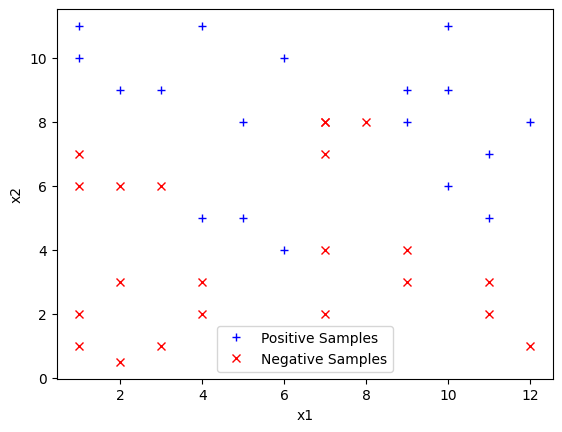

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advanced-Machine-Learning---Notebooks-master/Advanced-Machine-Learning---Notebooks-master/soft_margin_svm_data.csv', names=['x1', 'x2', 'y'])
train_x = data[['x1','x2']]
train_y = data['y']

data_pos = data[data.y == 1]
data_neg = data[data.y == -1]

plt.plot(data_pos.x1, data_pos.x2, 'b+', label='Positive Samples')
plt.plot(data_neg.x1, data_neg.x2, 'rx', label='Negative Samples')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# RBF kernel

The radial basis function (RBF) kernel, also known as the Gaussian kernel, is the default kernel for Support Vector Machines in scikit-learn. It measures similarity between two data points in infinite dimensions and then approaches classification by majority vote. The kernel function is defined as:

$$
K(\mathbf{x}_1, \mathbf{x}_2) = \exp\!\big(-\gamma \cdot \lVert \mathbf{x}_1 - \mathbf{x}_2 \rVert^2\big)
$$

where $\gamma$ (**gamma**) controls the influence of each individual training sample on the decision boundary.

The larger the euclidean distance between two points $\lVert \mathbf{x}_1 - \mathbf{x}_2 \rVert^2$ the closer the kernel function is to zero. This means that two points far away are more likely to be dissimilar.


In [ ]:
# Fitting svm RBF
clf = svm.SVC(kernel='rbf', gamma=0.5, C=0.35)
clf.fit(train_x, train_y)

xx, yy = make_meshgrid(data['x1'], data['x2'])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


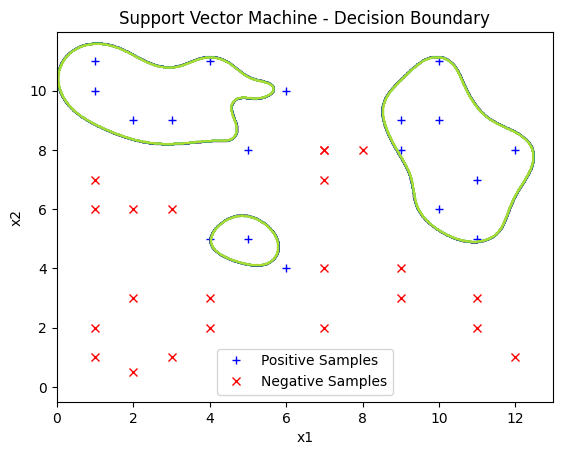

In [ ]:
data_pos = data[data.y == 1]
data_neg = data[data.y == -1]

plt.plot(data_pos.x1, data_pos.x2, 'b+', label='Positive Samples')
plt.plot(data_neg.x1, data_neg.x2, 'rx', label='Negative Samples')
plot_contours(plt, clf, xx, yy)

plt.title('Support Vector Machine - Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## RBF SVM parameters
This example illustrates the effect of the parameters gamma and C of the Radial Basis Function (RBF) kernel SVM.

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

The first plot is a visualization of the decision function for a variety of parameter values on a simplified classification problem involving only 2 input features and 2 possible target classes (binary classification). Note that this kind of plot is not possible to do for problems with more features or target classes.

The second plot is a heatmap of the classifier’s cross-validation accuracy as a function of C and gamma. For this example we explore a relatively large grid for illustration purposes. In practice, a logarithmic grid from
 to
 is usually sufficient. If the best parameters lie on the boundaries of the grid, it can be extended in that direction in a subsequent search.

Note that the heat map plot has a special colorbar with a midpoint value close to the score values of the best performing models so as to make it easy to tell them apart in the blink of an eye.

The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

For intermediate values, we can see on the second plot that good models can be found on a diagonal of C and gamma. Smooth models (lower gamma values) can be made more complex by increasing the importance of classifying each point correctly (larger C values) hence the diagonal of good performing models.

Finally, one can also observe that for some intermediate values of gamma we get equally performing models when C becomes very large. This suggests that the set of support vectors does not change anymore. The radius of the RBF kernel alone acts as a good structural regularizer. Increasing C further doesn’t help, likely because there are no more training points in violation (inside the margin or wrongly classified), or at least no better solution can be found. Scores being equal, it may make sense to use the smaller C values, since very high C values typically increase fitting time.

On the other hand, lower C values generally lead to more support vectors, which may increase prediction time. Therefore, lowering the value of C involves a trade-off between fitting time and prediction time.

We should also note that small differences in scores results from the random splits of the cross-validation procedure. Those spurious variations can be smoothed out by increasing the number of CV iterations n_splits at the expense of compute time. Increasing the value number of C_range and gamma_range steps will increase the resolution of the hyper-parameter heat map.

notes :

* **Gamma (γ)** mengatur jarak pengaruh tiap sampel: kecil = pengaruh jauh & model lebih halus; besar = pengaruh dekat & model lebih tajam. Terlalu besar → **overfitting**; terlalu kecil → model terlalu kaku, mirip linear, gagal menangkap bentuk data.

* **C** adalah **regularisasi**: besar → memaksa semua data latih benar (margin kecil, model kompleks); kecil → toleransi salah lebih tinggi (margin besar, model lebih sederhana). Ada trade-off akurasi latih vs kesederhanaan model.

* **Plot 1** (hanya untuk kasus 2 fitur & 2 kelas): visualisasi batas keputusan untuk berbagai (C, γ). Tidak berlaku langsung untuk dimensi/kelas lebih banyak.

* **Plot 2 (heatmap CV)**: akurasi sebagai fungsi C dan γ. Umumnya model terbaik muncul di **diagonal**—model halus (γ rendah) bisa dibuat lebih kompleks dengan menaikkan C.

* Untuk beberapa **γ menengah**, saat C sangat besar, performa “mentok” (set support vector stabil). Lebih baik pilih C lebih kecil bila skornya sama (waktu fitting biasanya lebih cepat).

* **Dampak komputasi**: C lebih rendah → biasanya **lebih banyak support vector** → prediksi lebih lambat. Jadi menurunkan C trade-off antara waktu latih vs waktu prediksi.

* **Variasi skor** kecil bisa berasal dari **split CV acak**. Kurangi noise dengan menaikkan **n_splits** (lebih mahal komputasi). Menambah resolusi **grid** (lebih banyak langkah C dan γ) membuat heatmap lebih detail.

* **Praktik umum**: mulai dari grid logaritmik untuk C dan γ; jika optimum berada di tepi grid, **perluas** grid ke arah tersebut pada pencarian berikutnya.


In [ ]:
import numpy as np
from matplotlib.colors import Normalize


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

## TRAIN CLASSIFIER
For an initial search, a logarithmic grid with basis 10 is often helpful. Using a basis of 2, a finer tuning can be achieved but at a much higher cost.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': np.float64(1.0), 'gamma': np.float64(0.1)} with a score of 0.97


In [ ]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

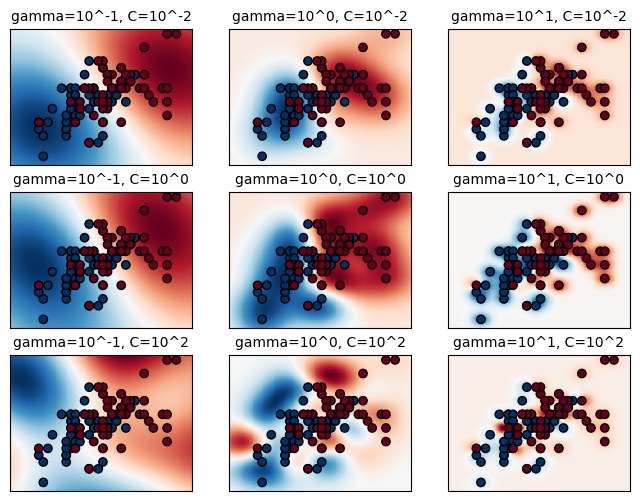

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for k, (C, gamma, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

------------------------------------------------

# Linear kernel

Linear kernel is the dot product of the input samples:

$$
K(\mathbf{x}_1,\mathbf{x}_2)=\mathbf{x}_1^{\top}\mathbf{x}_2
$$

It is then applied to any combination of two data points (samples) in the dataset.
The dot product of the two points determines the **cosine similarity** between both points.
The higher the value, the more similar the points are.


In [ ]:
# Fitting svm Linear
clf = svm.SVC(kernel='linear', gamma=0.2, C=0.35)
clf.fit(train_x, train_y)

xx, yy = make_meshgrid(data['x1'], data['x2'])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


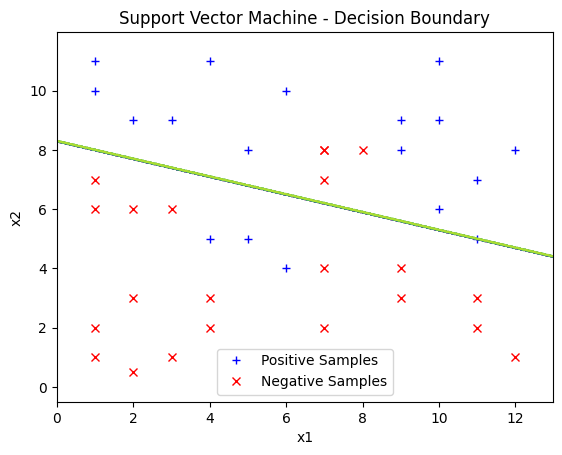

In [ ]:
data_pos = data[data.y == 1]
data_neg = data[data.y == -1]

plt.plot(data_pos.x1, data_pos.x2, 'b+', label='Positive Samples')
plt.plot(data_neg.x1, data_neg.x2, 'rx', label='Negative Samples')
plot_contours(plt, clf, xx, yy)

plt.title('Support Vector Machine - Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Polynomial kernel

The polynomial kernel changes the notion of similarity. The kernel function is defined as:

$$
K(\mathbf{x}_1,\mathbf{x}_2) \;=\; \big(\,\gamma \,\mathbf{x}_1^{\top}\mathbf{x}_2 \;+\; r\,\big)^{d}
$$

where $d$ is the degree (`degree`) of the polynomial, $\gamma$ (`gamma`) controls the influence of each individual
training sample on the decision boundary, and $r$ is the bias term (`coef0`) that shifts the data up or down.



In [ ]:
# Fitting svm Linear Polynomial
clf = svm.SVC(kernel='poly', gamma=0.2, C=0.35)
clf.fit(train_x, train_y)

xx, yy = make_meshgrid(data['x1'], data['x2'])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


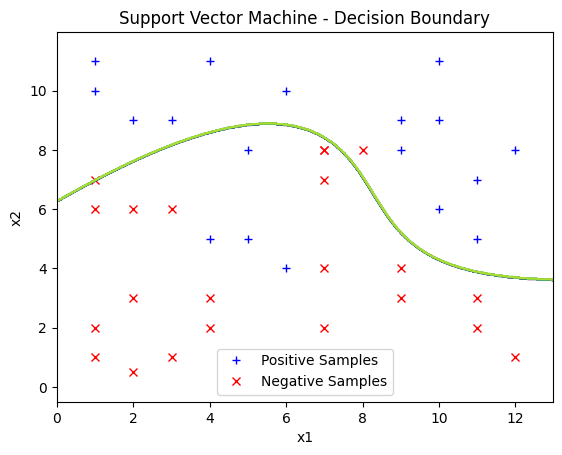

In [ ]:
data_pos = data[data.y == 1]
data_neg = data[data.y == -1]

plt.plot(data_pos.x1, data_pos.x2, 'b+', label='Positive Samples')
plt.plot(data_neg.x1, data_neg.x2, 'rx', label='Negative Samples')
plot_contours(plt, clf, xx, yy)

plt.title('Support Vector Machine - Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Sigmoid kernel

The sigmoid kernel function is defined as:

$$
K(\mathbf{x}_1,\mathbf{x}_2)=\tanh\!\big(\gamma\,\mathbf{x}_1^{\top}\mathbf{x}_2 + r\big)
$$

where the kernel coefficient $\gamma$ (`gamma`) controls the influence of each individual training sample on the decision boundary
and $r$ is the bias term (`coef0`) that shifts the data up or down.

In the sigmoid kernel, the similarity between two data points is computed using the hyperbolic tangent function (`tanh`).
The kernel function scales and possibly shifts the dot product of the two points ($\mathbf{x}_1$ and $\mathbf{x}_2$).


In [ ]:
# Fitting svm Linear Sigmoid
#clf = svm.SVC(kernel='sigmoid', gamma=0.2, C=0.35)
clf = svm.SVC(kernel='sigmoid', gamma=0.2, C=0.35)
clf.fit(train_x, train_y)

xx, yy = make_meshgrid(data['x1'], data['x2'])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


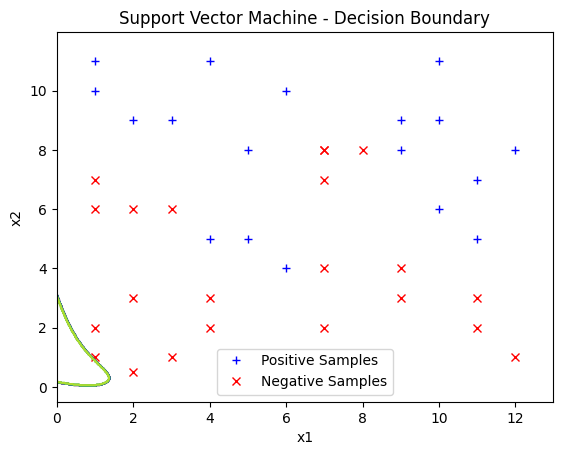

In [ ]:
data_pos = data[data.y == 1]
data_neg = data[data.y == -1]

plt.plot(data_pos.x1, data_pos.x2, 'b+', label='Positive Samples')
plt.plot(data_neg.x1, data_neg.x2, 'rx', label='Negative Samples')
plot_contours(plt, clf, xx, yy)

plt.title('Support Vector Machine - Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Custom Kernel

In [ ]:
# Fitting svm custom kernel
def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)

clf = svm.SVC(kernel=my_kernel)
clf.fit(train_x, train_y)

xx, yy = make_meshgrid(data['x1'], data['x2'])


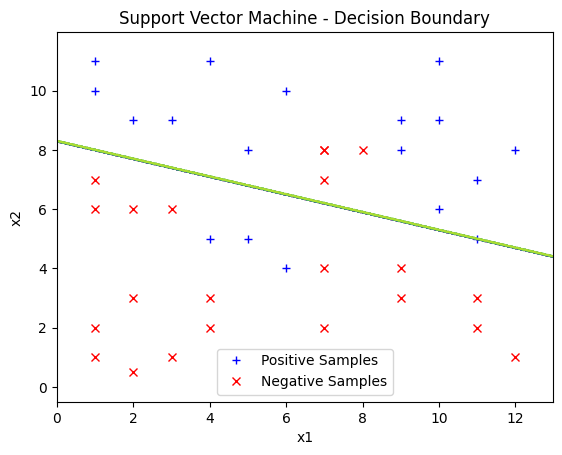

In [ ]:
data_pos = data[data.y == 1]
data_neg = data[data.y == -1]

plt.plot(data_pos.x1, data_pos.x2, 'b+', label='Positive Samples')
plt.plot(data_neg.x1, data_neg.x2, 'rx', label='Negative Samples')
plot_contours(plt, clf, xx, yy)

plt.title('Support Vector Machine - Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

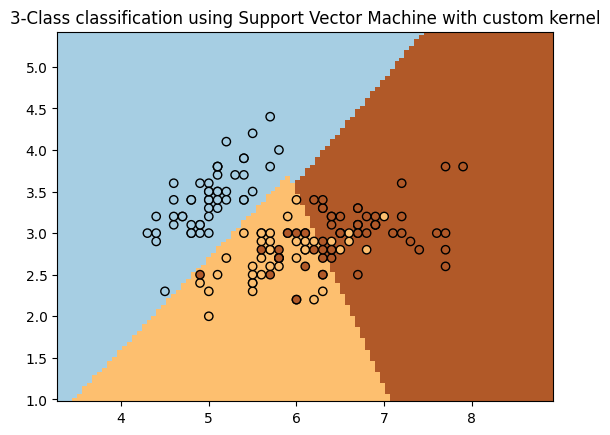

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = 0.02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()

## Plot classification boundaries with different SVM Kernels

This example shows how different kernels in a SVC (Support Vector Classifier) influence the classification boundaries in a binary, two-dimensional classification problem.

SVCs aim to find a hyperplane that effectively separates the classes in their training data by maximizing the margin between the outermost data points of each class. This is achieved by finding the best weight vector
 that defines the decision boundary hyperplane and minimizes the sum of hinge losses for misclassified samples, as measured by the hinge_loss function. By default, regularization is applied with the parameter C=1, which allows for a certain degree of misclassification tolerance.

If the data is not linearly separable in the original feature space, a non-linear kernel parameter can be set. Depending on the kernel, the process involves adding new features or transforming existing features to enrich and potentially add meaning to the data. When a kernel other than "linear" is set, the SVC applies the kernel trick, which computes the similarity between pairs of data points using the kernel function without explicitly transforming the entire dataset. The kernel trick surpasses the otherwise necessary matrix transformation of the whole dataset by only considering the relations between all pairs of data points. The kernel function maps two vectors (each pair of observations) to their similarity using their dot product.

The hyperplane can then be calculated using the kernel function as if the dataset were represented in a higher-dimensional space. Using a kernel function instead of an explicit matrix transformation improves performance, as the kernel function has a time complexity of
, whereas matrix transformation scales according to the specific transformation being applied.

In this example, we compare the most common kernel types of Support Vector Machines: the linear kernel ("linear"), the polynomial kernel ("poly"), the radial basis function kernel ("rbf") and the sigmoid kernel ("sigmoid").

## Creating Dataset

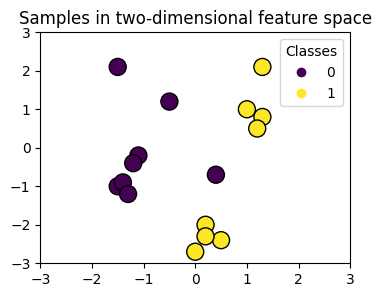

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [
        [0.4, -0.7],
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting settings
fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

## Training SVC model and plotting decision boundaries

We define a function that fits a SVC classifier, allowing the kernel parameter as an input, and then plots the decision boundaries learned by the model using DecisionBoundaryDisplay.

Notice that for the sake of simplicity, the C parameter is set to its default value (C=1) in this example and the gamma parameter is set to gamma=2 across all kernels, although it is automatically ignored for the linear kernel. In a real classification task, where performance matters, parameter tuning (by using GridSearchCV for instance) is highly recommended to capture different structures within the data.

Setting response_method="predict" in DecisionBoundaryDisplay colors the areas based on their predicted class. Using response_method="decision_function" allows us to also plot the decision boundary and the margins to both sides of it. Finally the support vectors used during training (which always lay on the margins) are identified by means of the support_vectors_ attribute of the trained SVCs, and plotted as well.

In [ ]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

## Linear Kernel

Training a SVC on a linear kernel results in an untransformed feature space, where the hyperplane and the margins are straight lines. Due to the lack of expressivity of the linear kernel, the trained classes do not perfectly capture the training data.

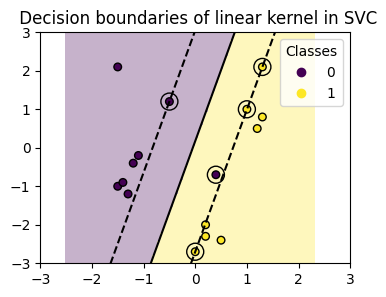

In [ ]:
plot_training_data_with_decision_boundary("linear")

## Polynomial Kernel
The polynomial kernel with gamma=2` adapts well to the training data, causing the margins on both sides of the hyperplane to bend accordingly.

Here, we use the default value for the degree of the polynomial in the kernel function (`degree=3`).
When `coef0=0` (the default), the data is only transformed, but no additional dimension is added.
Using a polynomial kernel is equivalent to creating **PolynomialFeatures** and then fitting an **SVC** with a linear kernel
on the transformed data, although this alternative approach would be computationally expensive for most datasets.

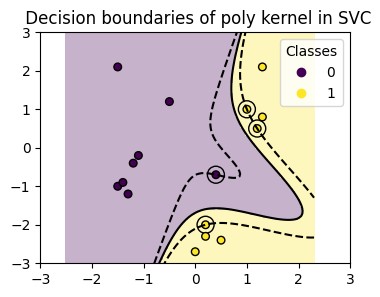

In [ ]:
plot_training_data_with_decision_boundary("poly")

## RBF Kernel

In the plot we can see how the decision boundaries tend to contract around data points that are close to each other.

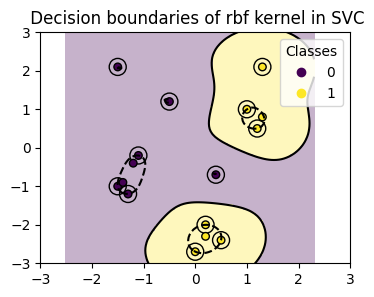

In [ ]:
plot_training_data_with_decision_boundary("rbf")

## Sigmoid Kernel

We can see that the decision boundaries obtained with the sigmoid kernel appear curved and irregular. The decision boundary tries to separate the classes by fitting a sigmoid-shaped curve, resulting in a complex boundary that may not generalize well to unseen data. From this example it becomes obvious, that the sigmoid kernel has very specific use cases, when dealing with data that exhibits a sigmoidal shape. In this example, careful fine tuning might find more generalizable decision boundaries. Because of it’s specificity, the sigmoid kernel is less commonly used in practice compared to other kernels.

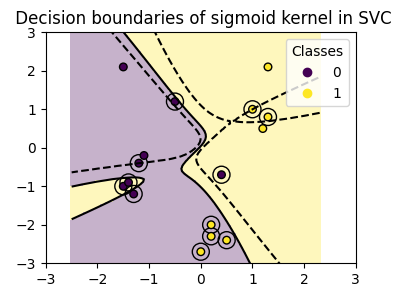

In [ ]:
plot_training_data_with_decision_boundary("sigmoid")

## XOR dataset

A classical example of a dataset which is not linearly separable is the XOR pattern. HEre we demonstrate how different kernels work on such a dataset.

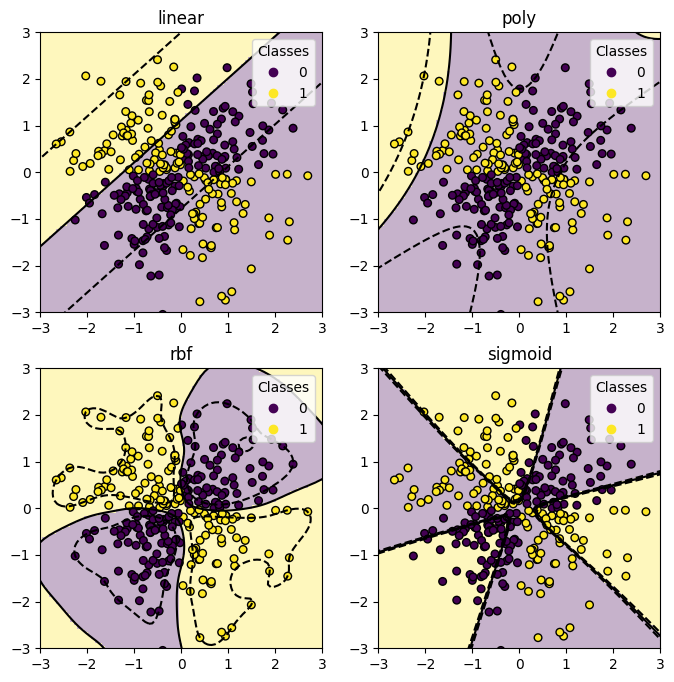

In [ ]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

_, ax = plt.subplots(2, 2, figsize=(8, 8))
args = dict(long_title=False, support_vectors=False)
plot_training_data_with_decision_boundary("linear", ax[0, 0], **args)
plot_training_data_with_decision_boundary("poly", ax[0, 1], **args)
plot_training_data_with_decision_boundary("rbf", ax[1, 0], **args)
plot_training_data_with_decision_boundary("sigmoid", ax[1, 1], **args)
plt.show()

## IRIS DATASET

# Comparison of different linear SVM classifiers

Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers with different kernels.

The linear models `LinearSVC()` and `SVC(kernel='linear')` yield slightly different decision boundaries. This can be a consequence of the following differences:

- `LinearSVC` minimizes the **squared hinge loss** while `SVC` minimizes the **regular hinge loss**.
- `LinearSVC` uses the **One-vs-All (OvR/ OvA)** multiclass reduction while `SVC` uses the **One-vs-One (OvO)** multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.


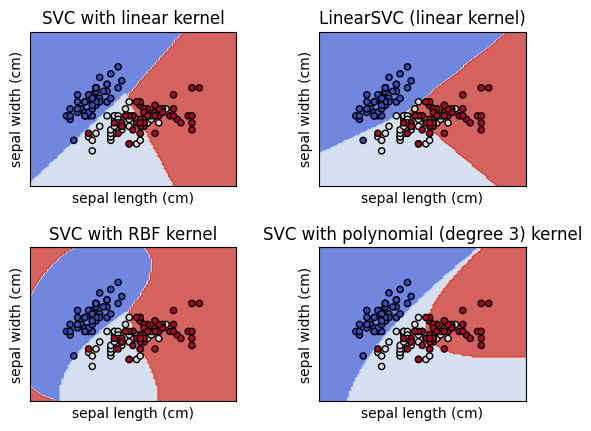

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

A comparison for the decision boundaries generated on the iris dataset by Label Spreading, Self-training and SVM.

This example demonstrates that Label Spreading and Self-training can learn good boundaries even when small amounts of labeled data are available.

Note that Self-training with 100% of the data is omitted as it is functionally identical to training the SVC on 100% of the data.

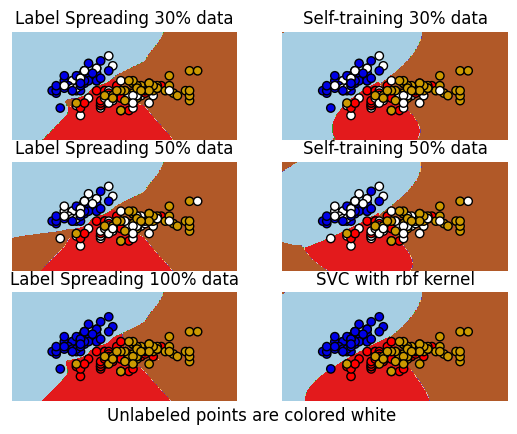

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading, SelfTrainingClassifier
from sklearn.svm import SVC

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# step size in the mesh
h = 0.02

rng = np.random.RandomState(0)
y_rand = rng.rand(y.shape[0])
y_30 = np.copy(y)
y_30[y_rand < 0.3] = -1  # set random samples to be unlabeled
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30, "Label Spreading 30% data")
ls50 = (LabelSpreading().fit(X, y_50), y_50, "Label Spreading 50% data")
ls100 = (LabelSpreading().fit(X, y), y, "Label Spreading 100% data")

# the base classifier for self-training is identical to the SVC
base_classifier = SVC(kernel="rbf", gamma=0.5, probability=True)
st30 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_30),
    y_30,
    "Self-training 30% data",
)
st50 = (
    SelfTrainingClassifier(base_classifier).fit(X, y_50),
    y_50,
    "Self-training 50% data",
)

rbf_svc = (SVC(kernel="rbf", gamma=0.5).fit(X, y), y, "SVC with rbf kernel")

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}

classifiers = (ls30, st30, ls50, st50, ls100, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("off")

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors="black")

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()